In [1]:
import numpy as np;
def ChebDiff(N):
    g = np.linspace(0,1,N+1);
    x = np.cos(np.pi*g);
    D = np.zeros((N+1,N+1));
    D[0][0] = (2*N*N+1)/6;
    D[N][N] = -D[0][0];
    for j in range(1,N):
        D[j][j] = -0.5*x[j]/(1-x[j]*x[j]);
    c = np.ones(N+1);
    c[0] = 2;
    c[N] = 2;
    for i in range(0,N+1):
        for j in range(0,i):
            D[i][j] = c[i]/c[j]*(-1)**(i+j)/(x[i]-x[j]);
        for j in range(i+1,N+1):
            D[i][j] = c[i]/c[j]*(-1)**(i+j)/(x[i]-x[j]);
    return D,x;

In [2]:
import numpy as np;
def myfunction(x):
    # exp(x)sin(5x);
    f = np.exp(x)*np.sin(5*x);
    fprime = (np.exp(x)*np.sin(5*x)+5*np.exp(x)*np.cos(5*x));
    return f,fprime;

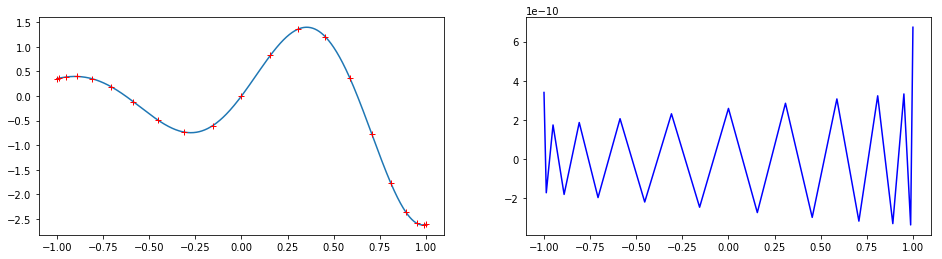

In [6]:
N = 20;
[D,x] = ChebDiff(N);
[f,fprime] = myfunction(x);
Df = D.dot(f);
error = Df-fprime;
np.amax(np.abs(error))
nplot = 1001;
xplot = np.linspace(-1,1,nplot);
[fplot,fplotprime] = myfunction(xplot);
import matplotlib.pyplot as plt;
fig, ax = plt.subplots(nrows=1, ncols=2);
ax[0].plot(xplot,fplot);
ax[0].plot(x,f,'r+');
ax[1].plot(x,error,'b-');
plt.rcParams["figure.figsize"] = [16,4];
plt.show();

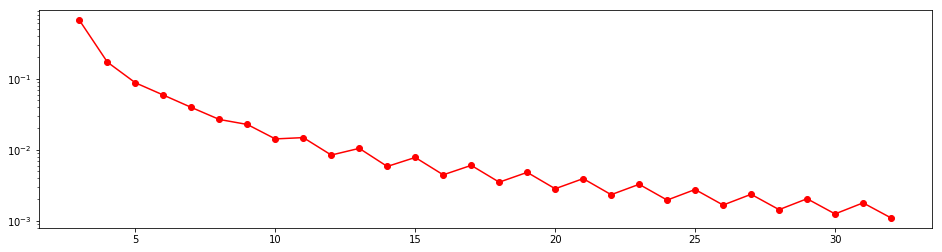

In [8]:
Nmax = 30;
E = np.zeros(Nmax);
Nrange = np.arange(3,3+Nmax);
for N in Nrange:
    [D,x] = ChebDiff(N);
    # First example
    v = np.abs(x)**3;
    vprime = 3*x*np.abs(x);
#     # Second example
#     v = np.exp(-1/x**2);
#     vprime = 2*v/x**3;
#     # Third example
#     v = 1/(1+x**2);
#     vprime = -2*x*v**2;
#     # Fourth example
#     v = x**10;
#     vprime = 10*x**9;
    
    E[N-3] = np.max(np.abs(D.dot(v)-vprime));

import matplotlib.pyplot as plt;
plt.semilogy(Nrange,E,'ro-');
plt.rcParams["figure.figsize"] = [16,4];
plt.show();

In [26]:
Nrange

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])